In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import GridSearchCV
from sklearn.exceptions import ConvergenceWarning
import warnings
warnings.filterwarnings("ignore")

In [4]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
 

## 1-Data Understanding

In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# Dataset Overview
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


## 2- Data Cleaning

In [9]:
train.drop_duplicates(inplace=True)
test.drop_duplicates(inplace=True)

In [10]:
# the age is float, we can convert it to int
# drop name column

train.columns = train.columns.str.lower()

test.columns = test.columns.str.lower()

-Handling missing values

In [11]:
# see the precentege of NaNs on cabin column
train['cabin'].isna().sum() / len(train) * 100

77.10437710437711

In [12]:
#showing the dataframe which has column ' cabin not null'
train[train['cabin'].notnull()]

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [13]:
#showing the relation between the survived and the cabin to decide drop the column or no
px.histogram(train, x='cabin', color='survived', title='Relation between the survived and the cabin')

In [14]:
# drop unsessairy columns
train.drop(['ticket', 'cabin' ], axis=1, inplace=True)

In [15]:
test.drop(['ticket', 'cabin' ], axis=1, inplace=True)

In [16]:
train.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,fare,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


# Feature Engineering

<Axes: xlabel='count', ylabel='title'>

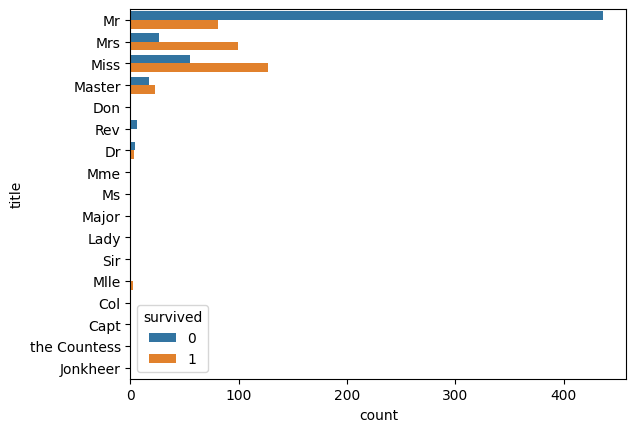

In [17]:
# Extract the title from the name
train['title'] = train['name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
sns.countplot(y='title', data=train,hue='survived')

In [18]:
test['title'] = test['name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())

In [19]:
title_mapping = {
    'Mr': 'Mr',
    'Miss': 'Mrs',
    'Mrs': 'Mrs',
    'Master': 'Mr',
    'Ms': 'Mrs',
    'Mme': 'Mrs',
    'Mlle': 'Mrs',
    'Dr': 'Rare',
    'Rev': 'Rare',
    'Major': 'Crew',
    'Col': 'Crew',
    'Capt': 'Crew',
    'Sir': 'Rare',
    'Lady': 'Rare',
    'Don': 'Rare',
    'Jonkheer': 'Rare',
    'the Countess': 'Rare'
}


train['title'].map(title_mapping)

0        Mr
1       Mrs
2       Mrs
3       Mrs
4        Mr
       ... 
886    Rare
887     Mrs
888     Mrs
889      Mr
890      Mr
Name: title, Length: 891, dtype: object

In [20]:
test['title'].map(title_mapping)

0       Mr
1      Mrs
2       Mr
3       Mr
4      Mrs
      ... 
413     Mr
414    NaN
415     Mr
416     Mr
417     Mr
Name: title, Length: 418, dtype: object

In [21]:
train.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,fare,embarked,title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Mr


In [22]:
train.drop(['name', 'passengerid'], axis=1, inplace=True)

In [23]:
test.drop('name', axis=1, inplace=True)

In [24]:
# fill nan values in age column and convert it to int
train['age']=train['age'].fillna(train['age'].median())
train['age'] = train['age'].apply(lambda x: int(x) if not np.nan else x)
train['age'] = train['age'].astype(int)

In [25]:
test['age']=test['age'].fillna(test['age'].median())
test['age'] = test['age'].apply(lambda x: int(x) if not np.nan else x)
test['age'] = test['age'].astype(int)

In [26]:
train['pclass'].value_counts()

3    491
1    216
2    184
Name: pclass, dtype: int64

In [27]:
train['age'].value_counts()

28    204
24     31
22     27
30     27
18     26
     ... 
12      1
66      1
53      1
80      1
74      1
Name: age, Length: 71, dtype: int64

<Axes: ylabel='age'>

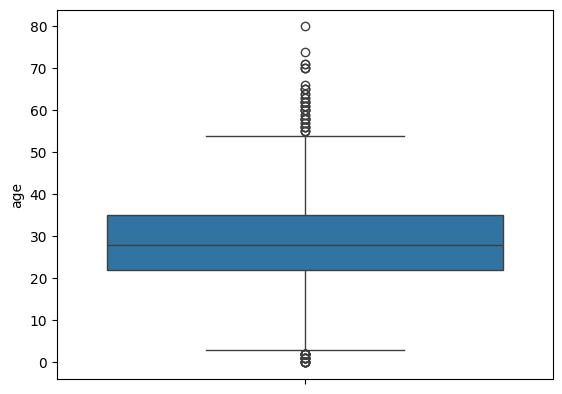

In [28]:
sns.boxplot(data = train,y='age')

In [29]:
#make age band
def age_band(age):
    if age <= 16:
        return 'child'
    elif age > 16 and age <= 32:
        return 'young'
    elif age > 32 and age <= 48:
        return 'middle'
    elif age > 48 and age <= 64:
        return 'old'
    else:
        return 'very old'

In [30]:
train['ageband']= train['age'].apply(age_band)

In [31]:
test['ageband']= test['age'].apply(age_band)

In [32]:
test.drop('age', axis=1, inplace=True)

In [33]:
train.drop('age', axis=1, inplace=True)

## Analysis Questions

<Axes: xlabel='ageband', ylabel='count'>

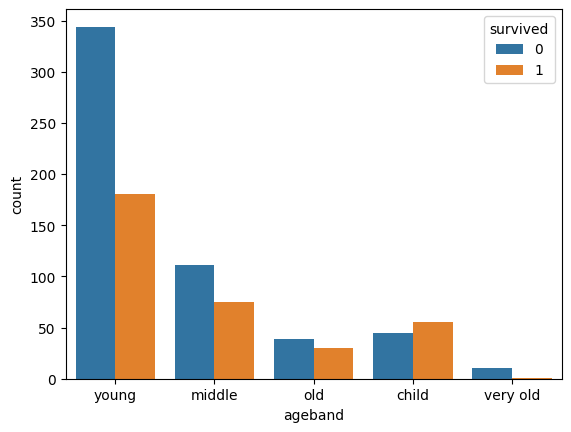

In [34]:
# showing the distubtion of the new age band
sns.countplot(data=train, x='ageband', hue='survived')

<Axes: xlabel='survived', ylabel='count'>

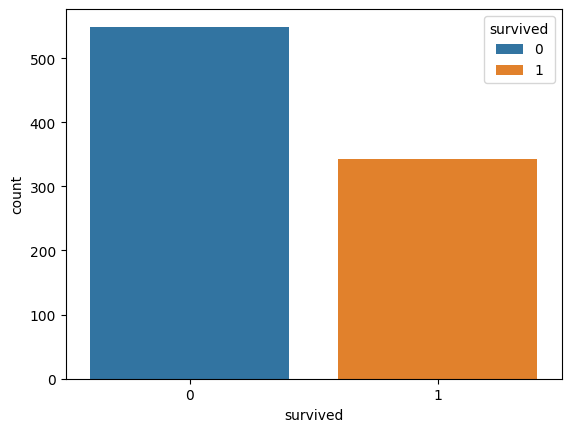

In [35]:
sns.countplot(x='survived', data=train, hue='survived')

In [36]:
train.columns

Index(['survived', 'pclass', 'sex', 'sibsp', 'parch', 'fare', 'embarked',
       'title', 'ageband'],
      dtype='object')

In [37]:
# making a for loop to showing the distrubtion of the numrical columns
for col in train.select_dtypes(include='number'):
    fig = px.histogram(train, x=col, color='survived')
    fig.show()


In [38]:
px.scatter(train, x='fare', color='survived')

<Axes: ylabel='fare'>

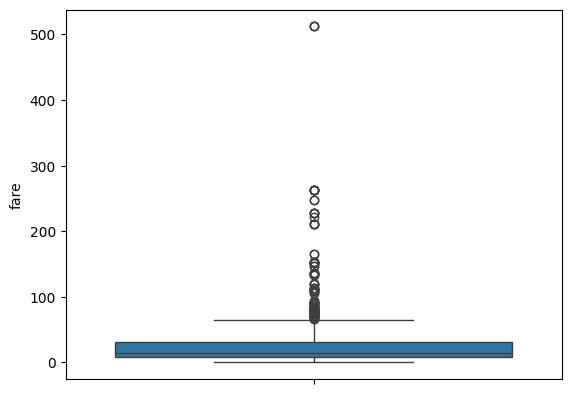

In [39]:
sns.boxplot(data= train, y='fare')

In [40]:
train['fare'].value_counts()

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: fare, Length: 248, dtype: int64

In [41]:
for i in train.select_dtypes(include = 'object'):
    print(train[i].value_counts())

male      577
female    314
Name: sex, dtype: int64
S    644
C    168
Q     77
Name: embarked, dtype: int64
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: title, dtype: int64
young       525
middle      186
child       100
old          69
very old     11
Name: ageband, dtype: int64


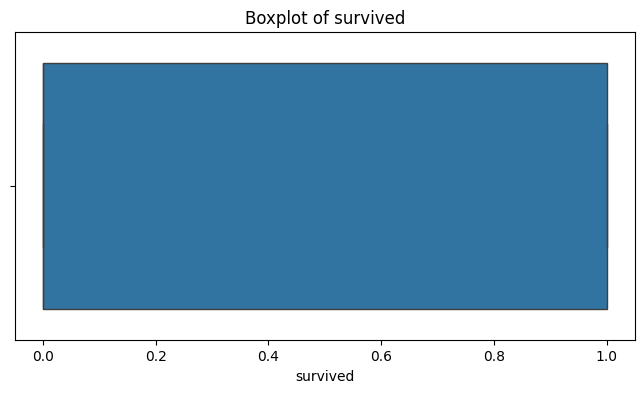

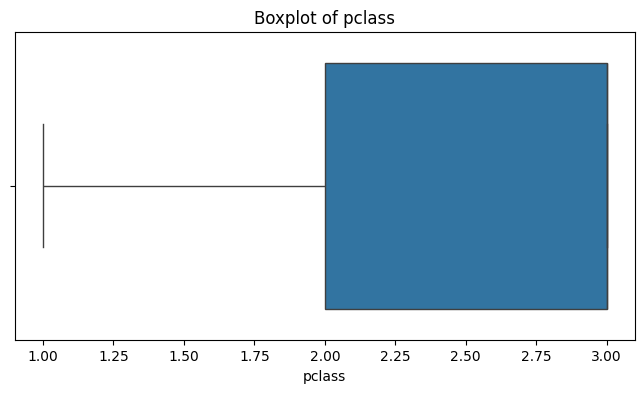

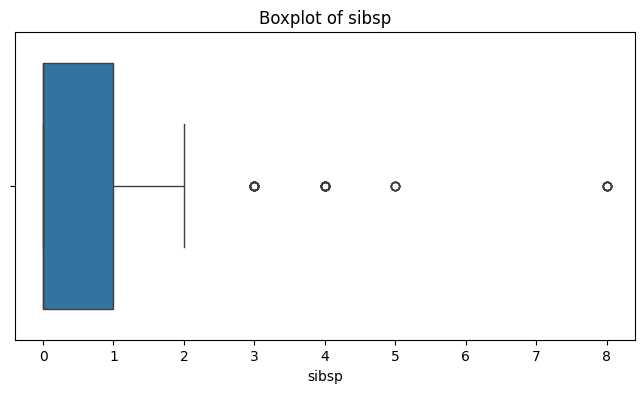

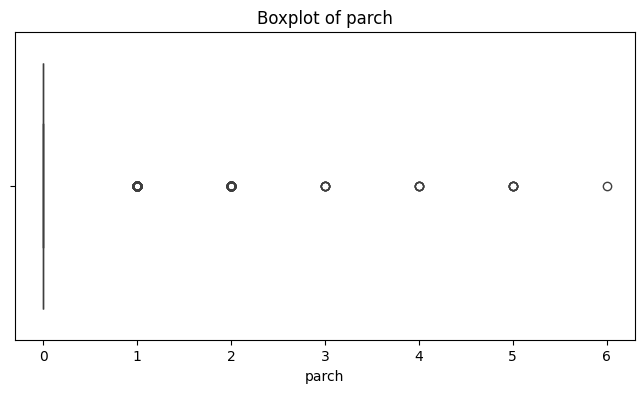

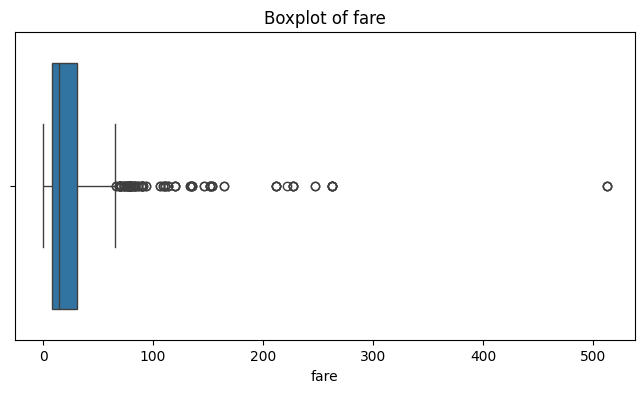

In [42]:

#showing the distrubtion of the numircal columns
for col in train.select_dtypes(include='number'):
    plt.figure(figsize=(8, 4)) 
    sns.boxplot(data=train, x=col)
    plt.title(f"Boxplot of {col}")
    plt.show()

## Data Preprocessing & ML

In [43]:
# Split Data into Input Features and Target Variable
y_train = train['survived']
X_train = train.drop('survived', axis=1)

In [44]:
y_train.value_counts()

0    549
1    342
Name: survived, dtype: int64

In [45]:
X_train['sibsp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: sibsp, dtype: int64

In [46]:
X_train['parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: parch, dtype: int64

## Handling Missing Values

In [47]:
train['family_size'] = train['sibsp'] + train['parch'] + 1

In [48]:
test['family_size'] = test['sibsp'] + test['parch'] + 1

In [49]:
# making a new column for the family size
X_train['family_size']=X_train['sibsp']+X_train['parch']+1 

In [50]:
test['family_size']=test['sibsp']+test['parch']+1

In [51]:
X_train.drop(['sibsp', 'parch'], axis=1, inplace=True)

In [52]:
test.drop(['sibsp', 'parch'], axis=1, inplace=True)

In [53]:
X_train.head()

,pclass,sex,fare,embarked,title,ageband,family_size
0,3,male,7.2500,S,Mr,young,2
1,1,female,71.2833,C,Mrs,middle,2
2,3,female,7.9250,S,Miss,young,1
3,1,female,53.1000,S,Mrs,middle,2
4,3,male,8.0500,S,Mr,middle,1


In [54]:
X_train['fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: fare, dtype: float64

In [55]:
X_train['fare'] = X_train['fare'].apply(lambda x: np.nan if x == 0 else x)

In [56]:
test['fare'] = test['fare'].apply(lambda x: np.nan if x == 0 else x)

In [57]:
train[train['fare'] == 0]

,survived,pclass,sex,sibsp,parch,fare,embarked,title,ageband,family_size
179,0,3,male,0,0,0.0,S,Mr,middle,1
263,0,1,male,0,0,0.0,S,Mr,middle,1
271,1,3,male,0,0,0.0,S,Mr,young,1
277,0,2,male,0,0,0.0,S,Mr,young,1
302,0,3,male,0,0,0.0,S,Mr,young,1
413,0,2,male,0,0,0.0,S,Mr,young,1
466,0,2,male,0,0,0.0,S,Mr,young,1
481,0,2,male,0,0,0.0,S,Mr,young,1
597,0,3,male,0,0,0.0,S,Mr,old,1
633,0,1,male,0,0,0.0,S,Mr,young,1


In [58]:
pclass1_median = X_train[X_train['pclass'] == 1]['fare'].median()
pclass2_median = X_train[X_train['pclass'] == 2]['fare'].median()
pclass3_median = X_train[X_train['pclass'] == 3]['fare'].median()

In [59]:
pclass1_median = test[test['pclass'] == 1]['fare'].median()
pclass2_median = test[test['pclass'] == 2]['fare'].median()
pclass3_median = test[test['pclass'] == 3]['fare'].median()

In [60]:
# now we gonna fill the nan values in fare column with the median value of each pclass
X_train[(X_train['fare'].isna())  & (X_train['pclass'] == 1)]

,pclass,sex,fare,embarked,title,ageband,family_size
263,1,male,NaN,S,Mr,middle,1
633,1,male,NaN,S,Mr,young,1
806,1,male,NaN,S,Mr,middle,1
815,1,male,NaN,S,Mr,young,1
822,1,male,NaN,S,Jonkheer,middle,1


In [61]:
X_train.loc[X_train['pclass'] == 1, 'fare'] = X_train.loc[X_train['pclass'] == 1, 'fare'].fillna(pclass1_median)
X_train.loc[X_train['pclass'] == 2, 'fare'] = X_train.loc[X_train['pclass'] == 2, 'fare'].fillna(pclass1_median)
X_train.loc[X_train['pclass'] == 3, 'fare'] = X_train.loc[X_train['pclass'] == 3, 'fare'].fillna(pclass1_median)

In [62]:
test.loc[test['pclass'] == 1, 'fare'] = test.loc[test['pclass'] == 1, 'fare'].fillna(pclass1_median)
test.loc[test['pclass'] == 2, 'fare'] = test.loc[test['pclass'] == 2, 'fare'].fillna(pclass1_median)
test.loc[test['pclass'] == 3, 'fare'] = test.loc[test['pclass'] == 3, 'fare'].fillna(pclass1_median)

In [63]:
# making a new column for the fare band depending on the fare iqr
def fare_band(fare):
    if fare <= 7.91:
        return 'low'
    elif fare > 7.91 and fare <= 14.454:
        return 'medium'
    elif fare > 14.454 and fare <= 31:
        return 'high'
    else:
        return 'very high'
    
X_train['fare_band'] = X_train['fare'].apply(fare_band)

In [64]:
test['fare_band'] = test['fare'].apply(fare_band)

In [65]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pclass       891 non-null    int64  
 1   sex          891 non-null    object 
 2   fare         891 non-null    float64
 3   embarked     889 non-null    object 
 4   title        891 non-null    object 
 5   ageband      891 non-null    object 
 6   family_size  891 non-null    int64  
 7   fare_band    891 non-null    object 
dtypes: float64(1), int64(2), object(5)
memory usage: 62.6+ KB


In [66]:
y_train

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: survived, Length: 891, dtype: int64

In [67]:
X_train.embarked.value_counts()

S    644
C    168
Q     77
Name: embarked, dtype: int64

In [68]:
X_train.drop('fare',axis=1,inplace = True)

In [69]:
test.head()

,passengerid,pclass,sex,fare,embarked,title,ageband,family_size,fare_band
0,892,3,male,7.8292,Q,Mr,middle,1,low
1,893,3,female,7.0000,S,Mrs,middle,2,low
2,894,2,male,9.6875,Q,Mr,old,1,medium
3,895,3,male,8.6625,S,Mr,young,1,medium
4,896,3,female,12.2875,S,Mrs,young,3,medium


In [70]:
test.drop('fare',axis=1,inplace = True)

In [71]:
X_train.head()

,pclass,sex,embarked,title,ageband,family_size,fare_band
0,3,male,S,Mr,young,2,low
1,1,female,C,Mrs,middle,2,very high
2,3,female,S,Miss,young,1,medium
3,1,female,S,Mrs,middle,2,very high
4,3,male,S,Mr,middle,1,medium


In [72]:
X_train['fare_band'].isna().sum()

0

In [73]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   pclass       891 non-null    int64 
 1   sex          891 non-null    object
 2   embarked     889 non-null    object
 3   title        891 non-null    object
 4   ageband      891 non-null    object
 5   family_size  891 non-null    int64 
 6   fare_band    891 non-null    object
dtypes: int64(2), object(5)
memory usage: 55.7+ KB


In [74]:
# encode the categorical columns to One Hot Encoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
ohe = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')

In [75]:
# Build pipeline: preprocessor + classifier
cat_pipeline = Pipeline(steps=[
    ('ohe', ohe)   
])
num_pipeline = Pipeline(steps=[
    ('imputer', KNNImputer(n_neighbors=5)),
    ('ohe',ohe)
])
numerical_col  = X_train.select_dtypes(include='number').columns
categorical_col = X_train.select_dtypes(include='object').columns

preprocessor = ColumnTransformer(transformers=[
    ('num', num_pipeline, numerical_col), 
    ('cat', ohe, categorical_col)
])



In [76]:
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(test)

In [77]:
y_train_encoded = y_train.copy() 

## 4- Model Selection & Evaluation

In [78]:
# using Logistic Regression model with GridSearch
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2', 'elasticnet'],
    'solver': ['saga']
}

model = LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced')

logestic_clf_g = GridSearchCV(model, param_grid, cv=5, scoring='f1', n_jobs=-1)
logestic_clf_g.fit(X_train_preprocessed, y_train_encoded)

print(f'Best Parameters: {logestic_clf_g.best_params_}')
print(f'train accuracy: {logestic_clf_g.best_score_}')

val_scores = cross_val_score(logestic_clf_g.best_estimator_, X_train_preprocessed, y_train_encoded, cv=5)
print(f'validation accuracy: {val_scores.mean()}')

y_valid_pred = cross_val_predict(logestic_clf_g.best_estimator_, X_train_preprocessed, y_train_encoded, cv=3)

print(f'precision: {precision_score(y_train, y_valid_pred)}')
print(f'recall: {recall_score(y_train, y_valid_pred)}')
print(f'f1_score: {f1_score(y_train, y_valid_pred)}')

print(confusion_matrix(y_train,y_valid_pred))


Best Parameters: {'C': 1, 'penalty': 'l2', 'solver': 'saga'}
train accuracy: 0.759587711010887
validation accuracy: 0.8114682066411399
precision: 0.7380281690140845
recall: 0.7660818713450293
f1_score: 0.7517934002869441
[[456  93]
 [ 80 262]]


In [79]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

param_grid = {'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'degree': [1, 2, 3, 4]}

model = SVC(C=1, kernel='poly', degree=2, class_weight='balanced', random_state=42)
Linearsvc_clf_g = GridSearchCV(model, param_grid, cv=5, scoring='f1')
Linearsvc_clf_g.fit(X_train_preprocessed, y_train)

print(f'Best Parameters: {Linearsvc_clf_g.best_params_}')
print(f'train accuracy: {Linearsvc_clf_g.score(X_train_preprocessed, y_train)}')

val_scores = cross_val_score(Linearsvc_clf_g, X_train_preprocessed, y_train, cv=5)
print(f'validation accuracy: {val_scores.mean()}')

y_valid_pred = cross_val_predict(Linearsvc_clf_g, X_train_preprocessed, y_train)
print(f'precision: {precision_score(y_train, y_valid_pred)}')
print(f'recall: {recall_score(y_train, y_valid_pred)}')
print(f'f1_score: {f1_score(y_train, y_valid_pred)}')

print(confusion_matrix(y_train, y_valid_pred))

Best Parameters: {'C': 10, 'degree': 2, 'kernel': 'poly'}
train accuracy: 0.8177905308464849
validation accuracy: 0.7415710459105511
precision: 0.7477744807121661
recall: 0.7368421052631579
f1_score: 0.7422680412371134
[[464  85]
 [ 90 252]]


In [80]:
# Using DecisionTreeClassifier with GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'], 
    'max_depth': [5, 10, 15, 20]
}

model = DecisionTreeClassifier(class_weight='balanced', random_state=42)


dt_clf_g = GridSearchCV(model, param_grid, cv=5, scoring='f1', n_jobs=-1)
dt_clf_g.fit(X_train_preprocessed, y_train)

best_model = dt_clf_g.best_estimator_

print(f'Best Parameters: {dt_clf_g.best_params_}')

train_score = best_model.score(X_train_preprocessed, y_train_encoded)
print(f'Train accuray: {train_score}')

val_scores = cross_val_score(best_model, X_train_preprocessed, y_train, cv=5, scoring='f1')
print(f'Validation Score: {val_scores.mean():.4f}')

y_valid_pred = cross_val_predict(best_model, X_train_preprocessed, y_train, cv=5)

print(f'Precision: {precision_score(y_train, y_valid_pred):.4f}')
print(f'Recall: {recall_score(y_train, y_valid_pred):.4f}')
print(f'F1 Score: {f1_score(y_train, y_valid_pred):.4f}')

print('Confusion Matrix:')
print(confusion_matrix(y_train, y_valid_pred))


Best Parameters: {'criterion': 'gini', 'max_depth': 5}
Train accuray: 0.8417508417508418
Validation Score: 0.7714
Precision: 0.7479
Recall: 0.7982
F1 Score: 0.7723
Confusion Matrix:
[[457  92]
 [ 69 273]]


In [81]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict, GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['minkowski', 'euclidean']
}

model = KNeighborsClassifier()
knn_clf_g = GridSearchCV(model, param_grid, cv=10, scoring='accuracy', n_jobs=-1)
knn_clf_g.fit(X_train_preprocessed, y_train)

print(f'Best Parameters: {knn_clf_g.best_params_}')
print(f'Train Accuracy: {knn_clf_g.best_score_}')

val_scores = cross_val_score(knn_clf_g.best_estimator_, X_train_preprocessed, y_train)
print(f'Validation Accuracy: {val_scores.mean()}')

y_valid_pred = cross_val_predict(knn_clf_g.best_estimator_, X_train_preprocessed, y_train, cv=3)

print(f'Precision: {precision_score(y_train,y_valid_pred)}')
print(f'Recall: {recall_score(y_train, y_valid_pred)}')
print(f'F1 Score: {f1_score(y_train,y_valid_pred)}')

print('Confusion Matrix:')
print(confusion_matrix(y_train, y_valid_pred))


Best Parameters: {'metric': 'minkowski', 'n_neighbors': 9, 'weights': 'uniform'}
Train Accuracy: 0.8238202247191012
Validation Accuracy: 0.818172117255665
Precision: 0.7731629392971247
Recall: 0.7076023391812866
F1 Score: 0.7389312977099237
Confusion Matrix:
[[478  71]
 [100 242]]


In [82]:

from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict, train_test_split, GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
'''
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
}

xgb_clf = XGBClassifier(random_state=42)

grid_search = GridSearchCV(xgb_clf, param_grid, cv=3, scoring='f1', n_jobs=-1, verbose=1)
grid_search.fit(X_train_preprocessed, y_train)

best_xgb = grid_search.best_estimator_

train_accuracy = best_xgb.score(X_train_preprocessed, y_train)
print(f'Train Accuracy: {train_accuracy:.4f}')

val_scores = cross_val_score(best_xgb, X_train_preprocessed, y_train, cv=5, scoring='f1')
print(f'Validation F1 Score: {val_scores.mean():.4f}')

y_valid_pred = best_xgb.predict(X_val)


print(f'Precision: {precision_score(y_val, y_valid_pred):.4f}')
print(f'Recall: {recall_score(y_val, y_valid_pred):.4f}')
print(f'F1 Score: {f1_score(y_val, y_valid_pred):.4f}')
print('Confusion Matrix:')
print(confusion_matrix(y_val, y_valid_pred))

'''

"\nparam_grid = {\n    'n_estimators': [100, 200, 300],\n    'max_depth': [3, 6, 9],\n    'learning_rate': [0.01, 0.1, 0.2],\n    'subsample': [0.7, 0.8, 0.9],\n    'colsample_bytree': [0.7, 0.8, 0.9]\n}\n\nxgb_clf = XGBClassifier(random_state=42)\n\ngrid_search = GridSearchCV(xgb_clf, param_grid, cv=3, scoring='f1', n_jobs=-1, verbose=1)\ngrid_search.fit(X_train_preprocessed, y_train)\n\nbest_xgb = grid_search.best_estimator_\n\ntrain_accuracy = best_xgb.score(X_train_preprocessed, y_train)\nprint(f'Train Accuracy: {train_accuracy:.4f}')\n\nval_scores = cross_val_score(best_xgb, X_train_preprocessed, y_train, cv=5, scoring='f1')\nprint(f'Validation F1 Score: {val_scores.mean():.4f}')\n\ny_valid_pred = best_xgb.predict(X_val)\n\n\nprint(f'Precision: {precision_score(y_val, y_valid_pred):.4f}')\nprint(f'Recall: {recall_score(y_val, y_valid_pred):.4f}')\nprint(f'F1 Score: {f1_score(y_val, y_valid_pred):.4f}')\nprint('Confusion Matrix:')\nprint(confusion_matrix(y_val, y_valid_pred))\n\n"

Visualize models

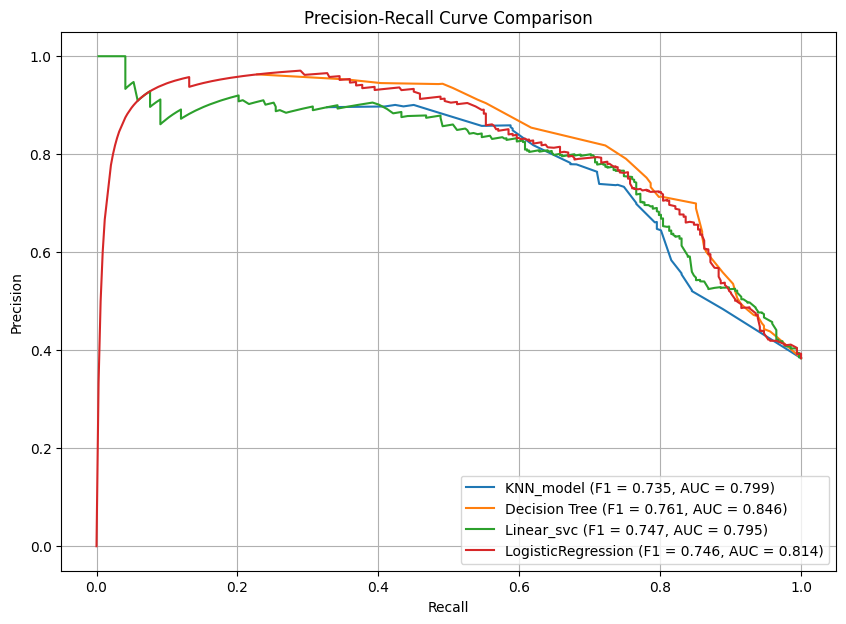

In [83]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, auc, f1_score
from sklearn.model_selection import cross_val_predict
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier

models = {
    'KNN_model':knn_clf_g,
    "Decision Tree": dt_clf_g,
    'Linear_svc': Linearsvc_clf_g,
    'LogisticRegression':logestic_clf_g
}

plt.figure(figsize=(10, 7))

for name, model in models.items():

    if hasattr(model, "predict_proba"):
        y_scores = cross_val_predict(model, X_train_preprocessed, y_train_encoded, cv=3, method="predict_proba")[:, 1]
    else:
        y_scores = cross_val_predict(model, X_train_preprocessed, y_train_encoded, cv=3, method="decision_function")

    precision, recall, _ = precision_recall_curve(y_train_encoded, y_scores)
    y_pred = (y_scores > 0.5).astype(int)
    f1 = f1_score(y_train_encoded, y_pred)
    
    auc_score = auc(recall, precision)
    plt.plot(recall[:-1], precision[:-1], label=f"{name} (F1 = {f1:.3f}, AUC = {auc_score:.3f})")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve Comparison")
plt.legend()
plt.grid()
plt.show()


In [84]:
y_train_encoded.value_counts()

0    549
1    342
Name: survived, dtype: int64


Train accuray: 0.8417508417508418
Validation Score: 0.7714
Precision: 0.7479
Recall: 0.7982
F1 Score: 0.7723
Confusion Matrix:
[[457  92]
 [ 69 273]]

In [85]:

test.head()

,passengerid,pclass,sex,embarked,title,ageband,family_size,fare_band
0,892,3,male,Q,Mr,middle,1,low
1,893,3,female,S,Mrs,middle,2,low
2,894,2,male,Q,Mr,old,1,medium
3,895,3,male,S,Mr,young,1,medium
4,896,3,female,S,Mrs,young,3,medium


## Enseambling Learning 

1- Bagging

In [89]:
from sklearn.ensemble import BaggingClassifier, BaggingRegressor
from sklearn.tree import DecisionTreeClassifier

bagging_dt_clf = BaggingClassifier(best_model, n_estimators=500, max_samples=100, bootstrap=True, n_jobs=-1, random_state=42)
bagging_dt_clf.fit(X_train_preprocessed, y_train_encoded)
bagging_dt_clf

BaggingClassifier(estimator=DecisionTreeClassifier(class_weight='balanced',
                                                   max_depth=5,
                                                   random_state=42),
                  max_samples=100, n_estimators=500, n_jobs=-1,
                  random_state=42)

In [90]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, accuracy_score
y_valid_pred = cross_val_predict(bagging_dt_clf, X_train_preprocessed, y_train_encoded, cv=3)
print(f"Train Accuracy: {bagging_dt_clf.score(X_train_preprocessed, y_train_encoded)}")
print(f"Valid Accuracy: {accuracy_score(y_train_encoded, y_valid_pred)}")
print(f"Valid precision: {precision_score(y_train_encoded, y_valid_pred)}")
print(f"Valid recall: {recall_score(y_train_encoded, y_valid_pred)}")
print(f"Valid f1: {f1_score(y_train_encoded, y_valid_pred)}")
confusion_matrix(y_train_encoded, y_valid_pred)

Train Accuracy: 0.8327721661054994
Valid Accuracy: 0.819304152637486
Valid precision: 0.7836990595611285
Valid recall: 0.7309941520467836
Valid f1: 0.75642965204236


array([[480,  69],
       [ 92, 250]], dtype=int64)

random Forest


In [103]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
rf_clf = RandomForestClassifier(random_state=42, max_depth=5, n_estimators=1000, max_samples=0.8)
rf_clf.fit(X_train_preprocessed, y_train_encoded)

RandomForestClassifier(max_depth=5, max_samples=0.8, n_estimators=1000,
                       random_state=42)

In [104]:
y_valid_pred = cross_val_predict(rf_clf, X_train_preprocessed, y_train_encoded, cv=3)
print(f"Train Accuracy: {rf_clf.score(X_train_preprocessed, y_train_encoded)}")
print(f"Valid Accuracy: {accuracy_score(y_train_encoded, y_valid_pred)}")
print(f"Valid precision: {precision_score(y_train_encoded, y_valid_pred)}")
print(f"Valid recall: {recall_score(y_train_encoded, y_valid_pred)}")
print(f"Valid f1: {f1_score(y_train_encoded, y_valid_pred)}")
confusion_matrix(y_train_encoded, y_valid_pred)

Train Accuracy: 0.8406285072951739
Valid Accuracy: 0.8249158249158249
Valid precision: 0.805921052631579
Valid recall: 0.716374269005848
Valid f1: 0.7585139318885449


array([[490,  59],
       [ 97, 245]], dtype=int64)

Boosting

In [93]:
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor

gbt_clf = GradientBoostingClassifier(n_estimators=5000, validation_fraction=0.1, n_iter_no_change=10, random_state=42)
gbt_clf.fit(X_train_preprocessed, y_train_encoded)


GradientBoostingClassifier(n_estimators=5000, n_iter_no_change=10,
                           random_state=42)

In [94]:
y_valid_pred = cross_val_predict(gbt_clf, X_train_preprocessed, y_train_encoded, cv=3)
print(f"Train Accuracy: {gbt_clf.score(X_train_preprocessed, y_train_encoded)}")
print(f"Valid Accuracy: {accuracy_score(y_train_encoded, y_valid_pred)}")
print(f"Valid precision: {precision_score(y_train_encoded, y_valid_pred)}")
print(f"Valid recall: {recall_score(y_train_encoded, y_valid_pred)}")
print(f"Valid f1: {f1_score(y_train_encoded, y_valid_pred)}")
confusion_matrix(y_train_encoded, y_valid_pred)

Train Accuracy: 0.8428731762065096
Valid Accuracy: 0.8204264870931538
Valid precision: 0.8226950354609929
Valid recall: 0.6783625730994152
Valid f1: 0.7435897435897436


array([[499,  50],
       [110, 232]], dtype=int64)

Voting

In [99]:
from sklearn.ensemble import VotingClassifier, VotingRegressor


voting_clf = VotingClassifier(estimators=[
    ('lr', logestic_clf_g.best_estimator_),
    ('dt', dt_clf_g.best_estimator_),
    ('knn', knn_clf_g.best_estimator_),
    ('rf', rf_clf),
    ('gbt', gbt_clf)
], voting='soft')
voting_clf.fit(X_train_preprocessed, y_train_encoded)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1, class_weight='balanced',
                                                 max_iter=1000, random_state=42,
                                                 solver='saga')),
                             ('dt',
                              DecisionTreeClassifier(class_weight='balanced',
                                                     max_depth=5,
                                                     random_state=42)),
                             ('knn', KNeighborsClassifier(n_neighbors=9)),
                             ('rf',
                              RandomForestClassifier(max_depth=5,
                                                     max_samples=500,
                                                     n_estimators=1000,
                                                     random_state=42)),
                             ('gbt',
                              GradientBoostingClassifier(n_estimators=5000,
                                                         n_iter_no_change=10,
                                                         random_state=42))],
                 voting='soft')

In [100]:
y_valid_pred = cross_val_predict(voting_clf, X_train_preprocessed, y_train_encoded, cv=3)
print(f"Train Accuracy: {voting_clf.score(X_train_preprocessed, y_train_encoded)}")
print(f"Valid Accuracy: {accuracy_score(y_train_encoded, y_valid_pred)}")
print(f"Valid precision: {precision_score(y_train_encoded, y_valid_pred)}")
print(f"Valid recall: {recall_score(y_train_encoded, y_valid_pred)}")
print(f"Valid f1: {f1_score(y_train_encoded, y_valid_pred)}")
confusion_matrix(y_train_encoded, y_valid_pred)

Train Accuracy: 0.8406285072951739
Valid Accuracy: 0.8294051627384961
Valid precision: 0.8044871794871795
Valid recall: 0.7339181286549707
Valid f1: 0.7675840978593272


array([[488,  61],
       [ 91, 251]], dtype=int64)

Stacking

In [111]:
from sklearn.ensemble import StackingClassifier

stacking_clf = StackingClassifier(estimators=[
    ('dt', dt_clf_g.best_estimator_),
    ('rf', rf_clf),
    ('logestic', logestic_clf_g.best_estimator_),
    ('RandomForestClassifier', RandomForestClassifier(random_state=42, max_depth=5, n_estimators=1000, max_samples=0.8)),
    ('GradientBoostingClassifier', GradientBoostingClassifier(n_estimators=5000, validation_fraction=0.1, n_iter_no_change=10, random_state=42))
    

],
)
stacking_clf.fit(X_train_preprocessed, y_train_encoded)

StackingClassifier(estimators=[('dt',
                                DecisionTreeClassifier(class_weight='balanced',
                                                       max_depth=5,
                                                       random_state=42)),
                               ('rf',
                                RandomForestClassifier(max_depth=5,
                                                       max_samples=0.8,
                                                       n_estimators=1000,
                                                       random_state=42)),
                               ('logestic',
                                LogisticRegression(C=1, class_weight='balanced',
                                                   max_iter=1000,
                                                   random_state=42,
                                                   solver='saga')),
                               ('RandomForestClassifier',
                                RandomForestClassifier(max_depth=5,
                                                       max_samples=0.8,
                                                       n_estimators=1000,
                                                       random_state=42)),
                               ('GradientBoostingClassifier',
                                GradientBoostingClassifier(n_estimators=5000,
                                                           n_iter_no_change=10,
                                                           random_state=42))])

In [112]:
y_valid_pred = cross_val_predict(stacking_clf, X_train_preprocessed, y_train_encoded, cv=3)
print(f"Train Accuracy: {stacking_clf.score(X_train_preprocessed, y_train_encoded)}")
print(f"Valid Accuracy: {accuracy_score(y_train_encoded, y_valid_pred)}")
print(f"Valid precision: {precision_score(y_train_encoded, y_valid_pred)}")
print(f"Valid recall: {recall_score(y_train_encoded, y_valid_pred)}")
print(f"Valid f1: {f1_score(y_train_encoded, y_valid_pred)}")
confusion_matrix(y_train_encoded, y_valid_pred)

Train Accuracy: 0.8383838383838383
Valid Accuracy: 0.8282828282828283
Valid precision: 0.7981072555205048
Valid recall: 0.7397660818713451
Valid f1: 0.7678300455235205


array([[485,  64],
       [ 89, 253]], dtype=int64)

i decided to soft voting

In [116]:
# apply the best model on the test data
y_test_pred = voting_clf.predict(X_test_preprocessed)

In [117]:
# trans the result to dataframe
submission = pd.DataFrame({'PassengerId': test['passengerid'], 'Survived': y_test_pred})

In [118]:
submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [119]:
# save the result to csv file
submission.to_csv('submission.csv', index=False)

In [120]:
# trying dt model
y_test_pred = best_model.predict(X_test_preprocessed)


In [122]:
submission1 = pd.DataFrame({'PassengerId': test['passengerid'], 'Survived': y_test_pred})

In [123]:
submission1.to_csv('submission1.csv', index=False)

In [124]:
# trying random forest model
y_test_pred = rf_clf.predict(X_test_preprocessed)


In [125]:
submission2 = pd.DataFrame({'PassengerId': test['passengerid'], 'Survived': y_test_pred})

In [127]:
submission2.to_csv('submission2.csv', index=False)

In [128]:
# trying stacking model
y_test_pred = stacking_clf.predict(X_test_preprocessed)
submission3 = pd.DataFrame({'PassengerId': test['passengerid'], 'Survived': y_test_pred})
submission3.to_csv('submission3.csv', index=False)

In [129]:
# trying gpt model
y_test_pred = gbt_clf.predict(X_test_preprocessed)
submission4 = pd.DataFrame({'PassengerId': test['passengerid'], 'Survived': y_test_pred})
submission4.to_csv('submission4.csv', index=False)